<strong>Preliminary Analysis</strong> <br>
  <li><strong>Data Cleaning Code </strong> <br>
        Code for cleaning and processing your data. Include a data dictionary for your transformed dataset. 
    <ul> 
      <li>
      Data Dictionary:
        <ul>
            <li><strong>id</strong>: A unique identifier for each tweet</li>
            <li><strong>text</strong>: the text of the tweet</li>
            <li><strong>location</strong>: the location the tweet was sent</li>
            <li><strong>keyword</strong>: a particular keyword from the tweet</li>
            <li><strong>target</strong>: denotes whether a tweet is about a real disaster(1) or not(0)</li>
        </ul>
      </li> 
    </ul> 
  </li>
  <li><strong>Exploratory Analysis </strong> <br>
       Describe what work you have done so far and include the code. This may include descriptive statistics, graphs and charts, and preliminary models. 
    <ul> 
      <li>
        For this preliminary analysis, we noticed that there were inconsistencies in the data columns so we adjusted them using the steps in the next bullet point.
        <li>
          The <strong>keyword</strong> column did not extract all the disaster keywords from the text. So we extracted the keyword column and text column and applied a function to extract the correct keywords by word tokenizing and extracting the words which intersect with the disaster word vector. 
        <li>
          The same was done for the <strong>location</strong> column.
        </li>
        </li>
      </li> 
    </ul> 
  </li>
  <li><strong>Challenges </strong> <br>
        Describe any challenges you've encountered so far. Let me know if there's anything you need help with! 
    <ul> 
      <li>
        There were many challenges when attempting to correct the inconsistent data columns. 
      </li> 
      <li>
          The <strong>keyword</strong> column wasn't as difficult but still came as a challenge as attempting the fillna using normal means wasnt working for us. But, we figured it out. 
      </li> 
      <li>
        The <strong>location</strong> column was difficult. Hands down took the longest to implement and even now doesnt work correctly as there arent efficient and free NER libraries to extract 'GPE' from texts. We attempted using 3 different types, one of which included using <strong>spaCy</strong>, but that didnt work with Google Colab. The other two that we used were very time consuming to run. Took a whomping <strong>17~20 minutes</strong> when using on the train data set. 
      </li> 
    </ul> 
  </li>
  <li><strong>Future Work </strong> <br>
        Describe what work you are planning to complete for the final analysis.
    <ul> 
      <li>Future work involves using our cleaned data and features as input for models suited for classification, like Naive Bayes and Logisitic Regression and training these models</li> 
      <li>Making predictions off our trained models and evaluating performance with accuracy scores and confusion matrices</li>
      <li>Defining our grid of hyperparameter values and using GridSearchCV() to systematically find the best peforming model</li>
      </ul> 
  </li>
  <li><strong>Contributions </strong> <br>
        Describe the contributions that each group member made. 
    <ul> 
      <li>
      Daniel Hernandez
      <ul> 
        <li>Researched and acquired the datasets
        </li>
        <li>Helped in brainstorming. 
        </li> 
        <li>Created and organized juypter notebook
        </li>
        <li>Implemented visualizations of data for preliminary analysis
        </li>
        <li>Assisted in thinking of procedure to clean data columns
        </li>
    </ul> 
      </li> 
      <li>
      Justin Park
      <ul> 
        <li>Helped in brainstorming.
        </li>
        <li>Implemented functions to clean keyword and location columns.
        </li> 
        <li>Implemented procedure to clean data columns.
        </li>
    </ul> 
      </li> 
    </ul> 
  </li>
</ul>



Notes for 11/17

- How do we deal with empty values for Keyword and Location?
- How would those columns be inputted into our model?
- Are these columns worth adding to the model in the first place or should we omit them?
- Should we normalize our tweets?
- How should we tokenize our Tweets?
<br>
<br>
<h2>Notes for 11/19 </h2>
<strong>Data cleaning </strong>
<ul>
<li>clean location feature, there is dirty data such as dates, symbols, and numeric values. </li>
<li>fill in NA values with numpy's NaN for machine learning. </li>
<li>set up word vector for emergencies.</li>
<li>use word vector to fill in NA values in the keyword section from text. </li>
</ul>

In [15]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn import feature_extraction, linear_model, model_selection, preprocessing
from nltk import word_tokenize, pos_tag, ne_chunk
from nltk import Tree
import spacy
# import matplotlib
# matplotlib.use('Agg')
!pip install locationtagger
import locationtagger
import re
import matplotlib.pyplot as plt
import seaborn as sns


In [16]:
import nltk
# essential entity models downloads
nltk.downloader.download('maxent_ne_chunker')
nltk.downloader.download('words')
nltk.downloader.download('treebank')
nltk.downloader.download('maxent_treebank_pos_tagger')
nltk.downloader.download('punkt')
nltk.download('averaged_perceptron_tagger')

nlp = spacy.load('en')

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package treebank to /root/nltk_data...
[nltk_data]   Package treebank is already up-to-date!
[nltk_data] Downloading package maxent_treebank_pos_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_treebank_pos_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [17]:
!pip install git+git://github.com/jmbielec/geograpy3.git 
!pip install git+https://github.com/jmbielec/geograpy3.git 
import geograpy3

  Cloning git://github.com/jmbielec/geograpy3.git to /tmp/pip-req-build-xu8ool77
  Running command git clone -q git://github.com/jmbielec/geograpy3.git /tmp/pip-req-build-xu8ool77
  Cloning https://github.com/jmbielec/geograpy3.git to /tmp/pip-req-build-7bbvcgb3
  Running command git clone -q https://github.com/jmbielec/geograpy3.git /tmp/pip-req-build-7bbvcgb3


In [18]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

# First lets get a general idea of what our data looks like:

In [19]:
# Count the amount of rows and columns
print("Shape of train_df:", train_df.shape)
print('\n\n')
# Counting the amount of missing values
print("null values:\n", train_df.isnull().sum())
print('\n\n')
# Observing the DataFrame's summary
train_df.info()

Shape of train_df: (7613, 5)



null values:
 id             0
keyword       61
location    2533
text           0
target         0
dtype: int64



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [20]:
train_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [21]:
train_df.isna().sum() # looks like we have some null values we need to fill in

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64


*   It looks like we need to fill in some values for keyword and location
*   Lets see if we can fill in these values based on what we find in the 'text' values

<h2>Fill in missing values for keyword column </h2>

In [23]:
# create word vector which contains the dissaster keywords
dissaster_vector = set(train_df['keyword'].unique());
# function which will fill in missing values for keyword column dependent on text column 
def fillKey(text):
  # tokenize the text and store into text_vector
  text_vector = set(word_tokenize(text.lower()))
  # find the dissaster keywords in text_vector
  filler = list(set.intersection(dissaster_vector, text_vector))
  # combine the filler array with a delimiter matching that of original format from keyword column
  filler = '%20'.join(filler)
  return filler

In [24]:
# auxilery DataFrame to handle DataFrame.apply()
t_df = pd.DataFrame()
t_df['keyword'] = train_df['text'].copy()
t_df.head()

,keyword
0,Our Deeds are the Reason of this #earthquake M...
1,Forest fire near La Ronge Sask. Canada
2,All residents asked to 'shelter in place' are ...
3,"13,000 people receive #wildfires evacuation or..."
4,Just got sent this photo from Ruby #Alaska as ...


In [25]:
# fill missing values for keyword column
t_df['keyword'] = t_df['keyword'].apply(fillKey)

# check if it worked
print(t_df.head(), '\n\n')
print(t_df.isnull().sum())

      keyword
0  earthquake
1        fire
2  evacuation
3  evacuation
4       smoke 


keyword    0
dtype: int64


In [26]:
# before replace missing
display(train_df.head())

# replacing the missing keyword values
train_df['keyword'] = t_df['keyword']

# after replace missing
display(train_df.head())

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


,id,keyword,location,text,target
0,1,earthquake,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,fire,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,evacuation,NaN,All residents asked to 'shelter in place' are ...,1
3,6,evacuation,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,smoke,NaN,Just got sent this photo from Ruby #Alaska as ...,1


<h2>Now to fill in missing values for locations </h2>

In [27]:
def fillTagLoc(txt):
  txt = re.sub(r'[#|@]',r'',txt)
  place_entity = locationtagger.find_locations(text = txt)
  filler = '%20'.join(set(place_entity.countries + place_entity.regions + place_entity.cities))
  return filler

In [28]:
def fillGeoLoc(text_input):
  text_input = re.sub(r'[#|@]',r'',text_input)
  place_entity = geograpy3.get_place_context(text = text_input)
  filler = '%20'.join(set(place_entity.countries + place_entity.regions + place_entity.cities))
  return filler

In [29]:
test_str = train_df['text'][5]

print(test_str, '\n\n')

# testing the fillLoc function
print('fillTagLoc:\n',fillTagLoc(test_str), '\n\n' )
print('fillGeoLoc:\n',fillGeoLoc(test_str), '\n\n' )

#RockyFire Update => California Hwy. 20 closed in both directions due to Lake County fire - #CAfire #wildfires 


fillTagLoc:
  


fillGeoLoc:
 RockyFire%20CAfire%20Update%20Lake County 




In [30]:
# now that we've gotten keyword column missing values filled in where it could, time to do same for location. 
# auxilery DataFrame to handle DataFrame.apply()
l_df = pd.DataFrame()
l_df['location'] = train_df['text'].copy()
l_df.head()

# fill missing values for keyword column.... ** WARNING !!! this took 17m to execute!
l_df['location'] = l_df['location'].apply(fillTagLoc)


In [31]:
# check if it worked
print(l_df.head(), '\n\n')
print(l_df.isnull().sum())

          location
0                 
1  Canada%20Forest
2                 
3       California
4                  


location    0
dtype: int64


In [32]:
# Great! it worked~~~~~~ 
# before 
display(train_df.head(10))
# now to fill in the missing values 
train_df['location'].fillna(l_df['location'], inplace=True)
# after
display(train_df.head(10))

,id,keyword,location,text,target
0,1,earthquake,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,fire,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,evacuation,NaN,All residents asked to 'shelter in place' are ...,1
3,6,evacuation,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,smoke,NaN,Just got sent this photo from Ruby #Alaska as ...,1
5,8,fire,NaN,#RockyFire Update => California Hwy. 20 closed...,1
6,10,flooding%20flood%20disaster,NaN,#flood #disaster Heavy rain causes flash flood...,1
7,13,fire,NaN,I'm on top of the hill and I can see a fire in...,1
8,14,emergency%20evacuation,NaN,There's an emergency evacuation happening now ...,1
9,15,tornado,NaN,I'm afraid that the tornado is coming to our a...,1


,id,keyword,location,text,target
0,1,earthquake,,Our Deeds are the Reason of this #earthquake M...,1
1,4,fire,Canada%20Forest,Forest fire near La Ronge Sask. Canada,1
2,5,evacuation,,All residents asked to 'shelter in place' are ...,1
3,6,evacuation,California,"13,000 people receive #wildfires evacuation or...",1
4,7,smoke,,Just got sent this photo from Ruby #Alaska as ...,1
5,8,fire,,#RockyFire Update => California Hwy. 20 closed...,1
6,10,flooding%20flood%20disaster,Colorado Springs%20Manitou,#flood #disaster Heavy rain causes flash flood...,1
7,13,fire,,I'm on top of the hill and I can see a fire in...,1
8,14,emergency%20evacuation,,There's an emergency evacuation happening now ...,1
9,15,tornado,,I'm afraid that the tornado is coming to our a...,1


In [33]:
# locations using spaCy 
# using .apply via PandaSeries instead of DataFrame
# location_df = train_df["text"].apply(nlp)

# print(location_df.ents)
# test_df.loc[df['keyword'] == null] = ['ablaze if']

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Disaster Tweets')

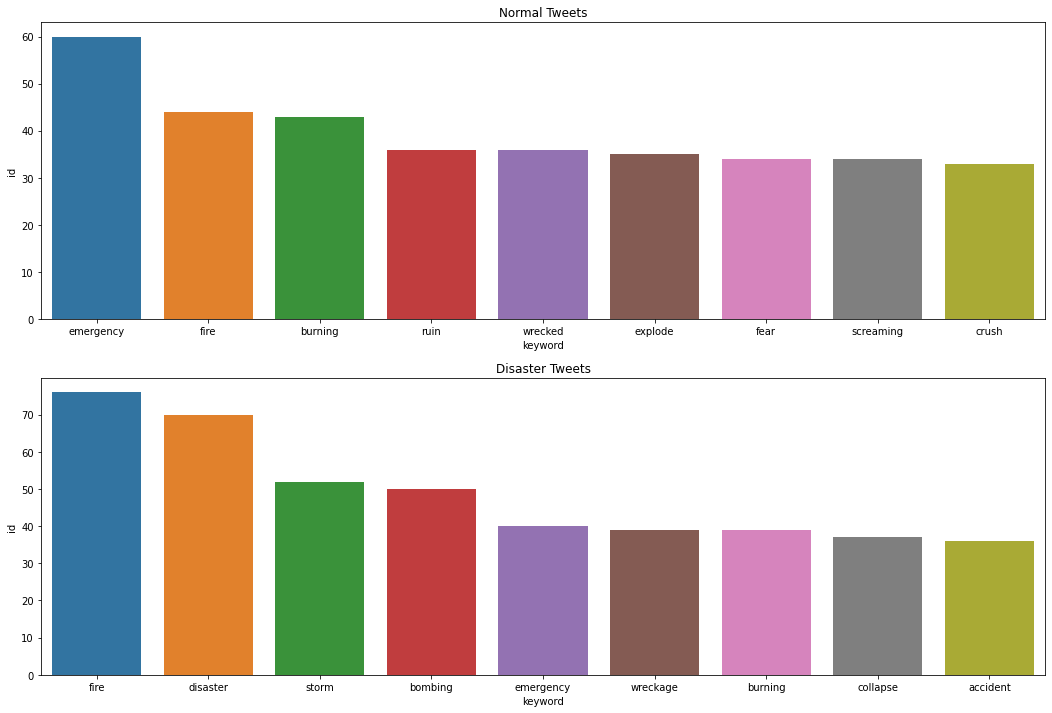

In [39]:
fig,axes= plt.subplots(2,1,figsize=(18,12))

temp = pd.DataFrame(train_df[train_df['target']==0].groupby('keyword')['id'].count())
temp.sort_values('id',ascending=False,inplace=True)
sns.barplot(temp.index[1:10],temp['id'][1:10],ax=axes[0]).set_title('Normal Tweets')


temp = pd.DataFrame(train_df[train_df['target']==1].groupby('keyword')['id'].count())
temp.sort_values('id',ascending=False,inplace=True)
sns.barplot(temp.index[1:10],temp['id'][1:10],ax=axes[1]).set_title('Disaster Tweets')

Based on the top keywords for Tweets that were and were not about a disaster:
*   It seems like both kind of tweets share some keywords, making it look like keywords are not helpful in deciding whether or not a Tweet is about a disaster or not
* However, there are some words that seem to be in Tweets about disasters and Tweets not about disasters
  * Storm
  * Bombing
  * Collapse
  * Accident



# Word Cloud for Normal Tweets and Tweets about Disasters

In [ ]:
# cleaning "text" column of train and test dataset and saving it to column 'clean_txt'

#stopwords = set(stopwords.word('english'))
# function for removing html
def cleanhtml (sentence):
    cleantext = re.sub(r'http\S+',r'',sentence)
    return cleantext

# function for removing punctuation
def cleanpunc(sentence):
    cleaned = re.sub(r'[?|!|\'|"|#@_%$\n:"]',r'',sentence)
    cleaned = re.sub(r'[.|,|)|(|)|\|/]',r' ', cleaned)  
    cleaned = re.sub(r'[0-9]', r'', cleaned)
    cleaned = re.sub(r'[ ]{2,}', r' ', cleaned)
    return cleaned
# function for cleaning 'column' of dataframe 'data' and saving cleaned text in column 'clean_txt'
def cleantxt(data,column):
    str1=' '
    final_string=[]
    s=''
    for sent in data[column]:
        filter_sent = []
        rem_html = cleanhtml(sent)
        rem_punc = cleanpunc (rem_html)
        str1 = rem_punc.lower()
        final_string.append(str1)
    data['clean_txt'] = np.array(final_string)

cleantxt(train_df,'text')

print(train_df.columns)
train_df.head()

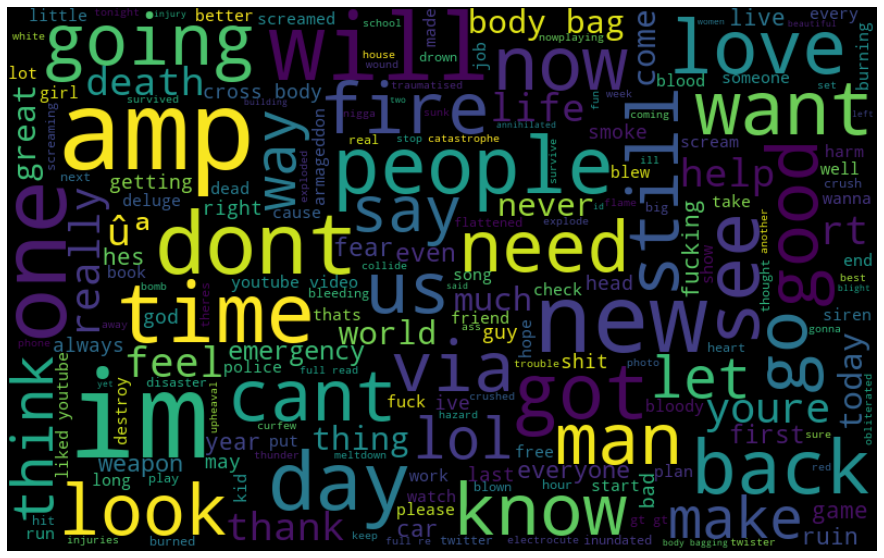

In [69]:
all_words = ' '.join([text for text in train_df['clean_txt'][train_df['target']==0]])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(16, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show() # note to self; remove links

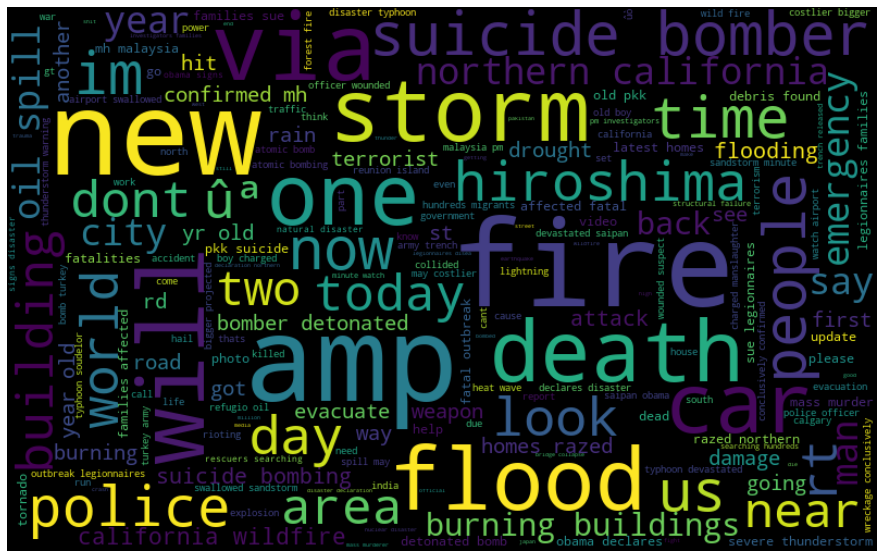

In [70]:
all_words = ' '.join([text for text in train_df['clean_txt'][train_df['target']==1]])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(16, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show() # note to self; remove links

* The difference in words for normal Tweets and Tweets about Disasters are day and night

In [ ]:
train_df[clean_txt]